## Importing Libraries and Dataset.

In [26]:
# Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
# getting the data into a DataFrame.
data=pd.read_csv("cardio_train.csv",sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [29]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# The age is given in days, we have to convert it into years.
data["age"] = data["age"]/365
data["age"] = data["age"].astype("int")

In [31]:
# Dropping id column, its of no use.
data = data.drop(columns = ["id"])

## Exploratory Data Analysis.

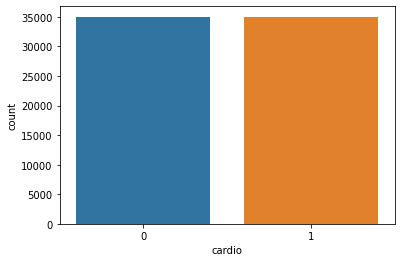

In [32]:
sns.countplot(x = 'cardio', data = data)

the dataset is well balanced.

Text(0.5, 1.0, 'Visualization of outliers')

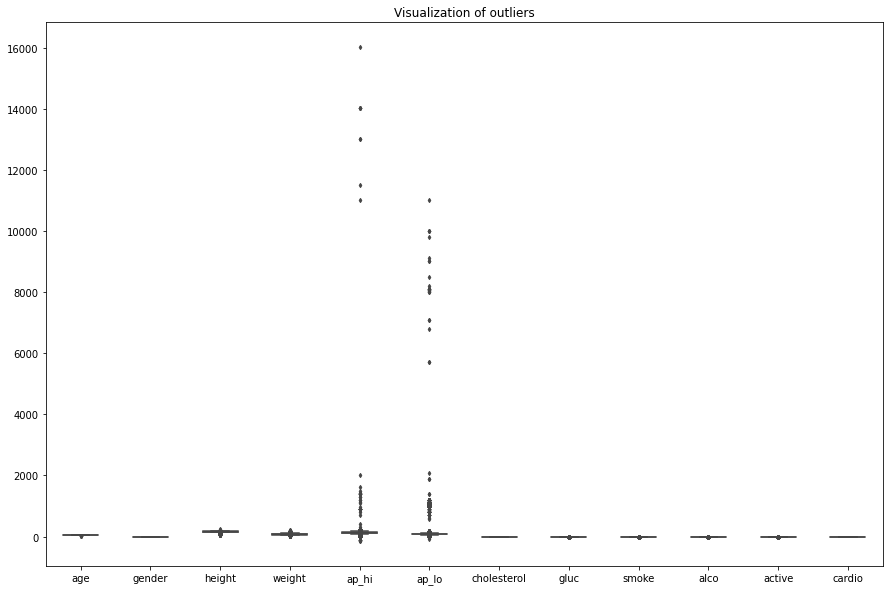

In [33]:
# Checking the existence of outliers using boxplots
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.title("Visualization of outliers")

Here we can see some outliers present in some features (app_hi, app_lo, height and weight)

In [34]:
# ap_hi greater than 200 and lower than or equal to 80 will be removed.
# ap_lo greater than 180 and lower than 50 will be removed.
# height lesser or equal to 100 and weight less than 28 will be removed.
outlier = ((data["ap_hi"]>200) | (data["ap_lo"]>180) | (data["ap_lo"]<50) | (data["ap_hi"]<=80) | (data["height"]<=100)
             | (data["weight"]<=28) )
print("There is {} outlier".format(data[outlier]["cardio"].count()))

There is 1451 outlier


We already have 70000 data and this 1434 is only a 2% of it.
So we have enough data to train the model even if we remove these outliers.

In [35]:
# Removing  the outlier from the Dataset.
data = data[~outlier]

In [36]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


Text(0.5, 1.0, 'Visualization of outliers')

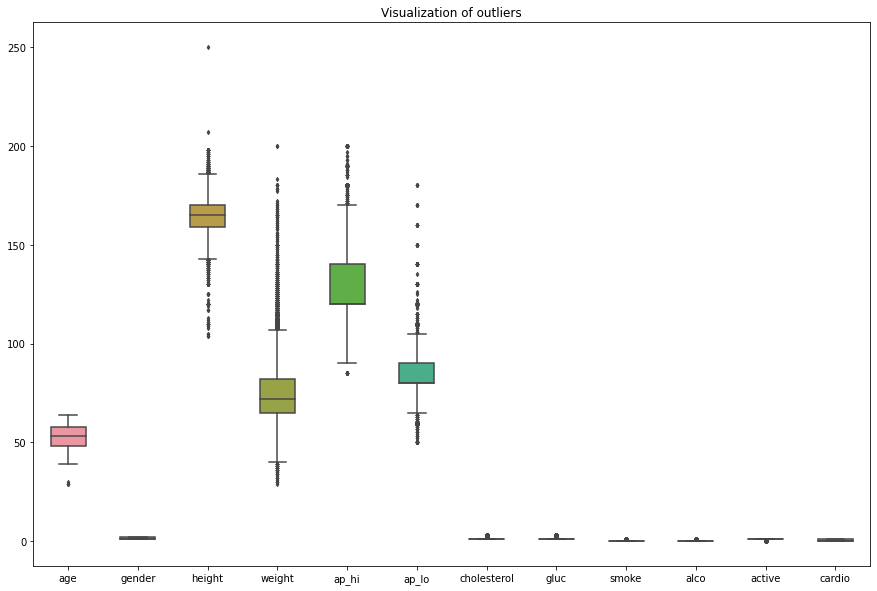

In [37]:
# BoxPlot after removing the outliers.
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.title("Visualization of outliers")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

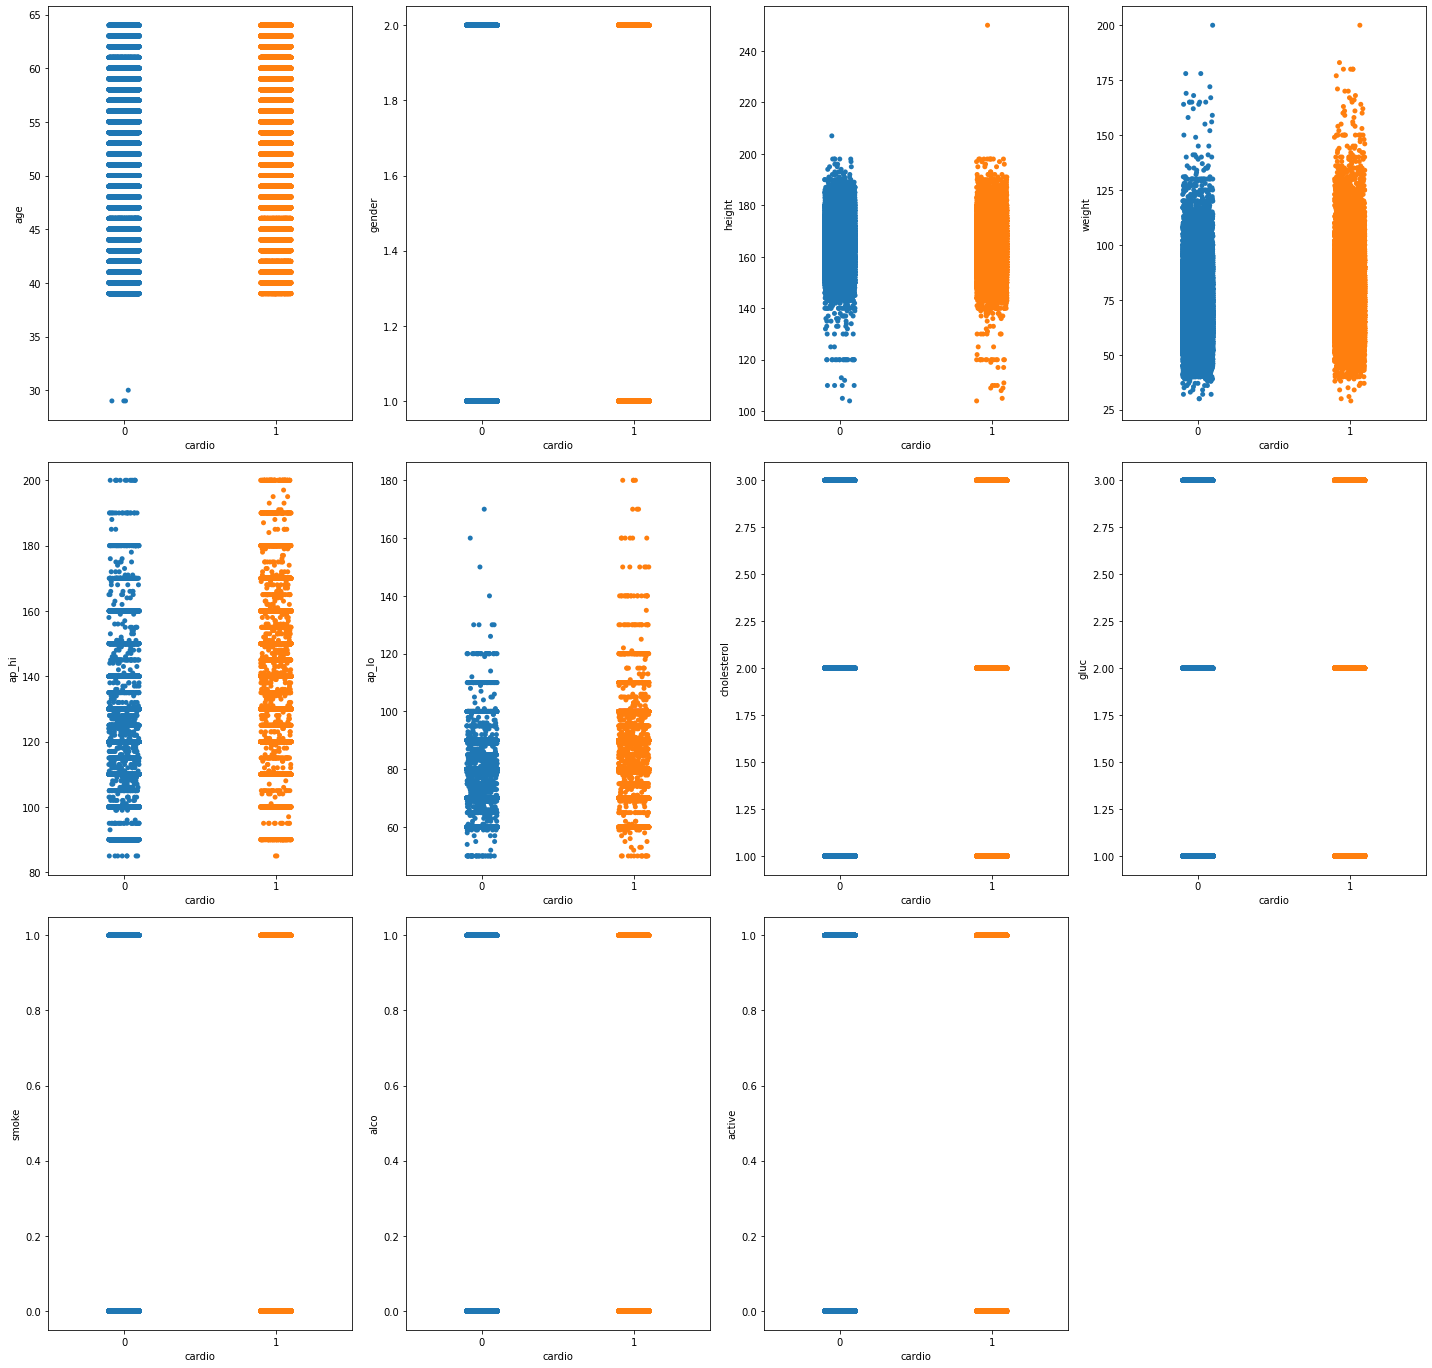

In [38]:
X = data.drop(columns = ['cardio'])
y = data['cardio']

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1

plt.tight_layout()


**Body Mass Index (BMI)**
Height and weight seems uncorrelated with the cardio feature but **Body Mass Index (BMI)** could be helpful to train our model.

In [39]:
data["bmi"] = data["weight"]/ (data["height"]/100)**2

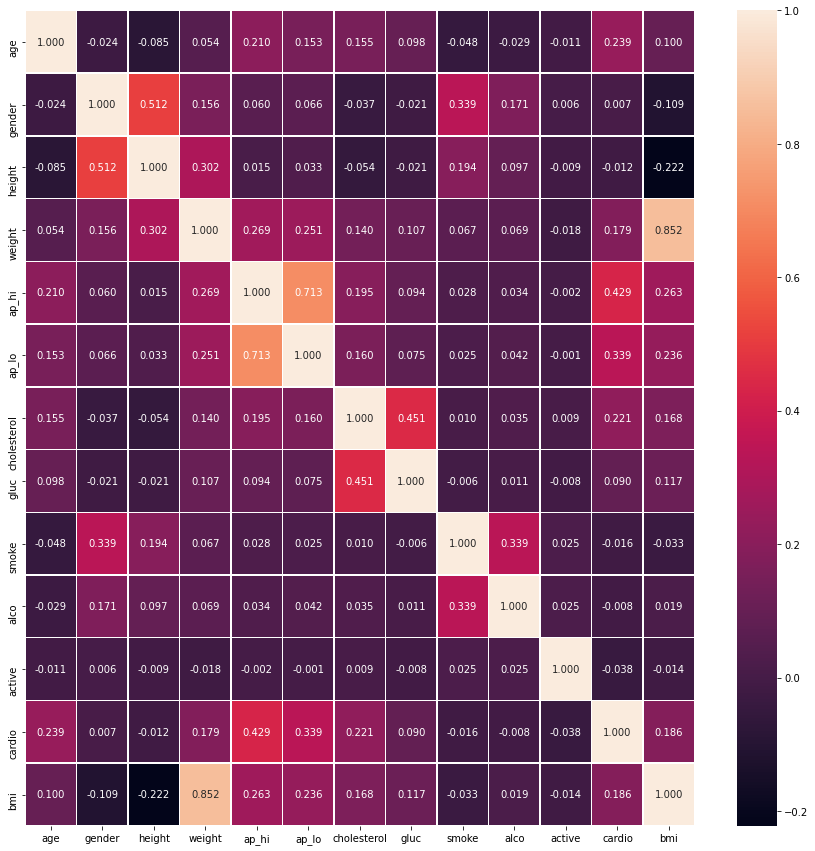

In [40]:
# creating a heatmap of correlation of the data.
corr = data.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

As you can see in the above **heatmap**, there are **correlations** among **gender and height**, **ap_lo and ap_hi**, **gluc and cholestrol**, and a small correlation among **smoke and alco**.

Since the correlation of some attributes like gender, height, gluc, smoke, alco, active with the target variable "cardio" is very less. Therefore, we will drop these attributes.

In [41]:
X = data.drop(columns = ['cardio','gender', 'height', 'gluc', 'smoke', 'alco', 'active'])
y = data['cardio']

In [42]:
X.head()

,age,weight,ap_hi,ap_lo,cholesterol,bmi
0,50,62.0,110,80,1,21.967120
1,55,85.0,140,90,3,34.927679
2,51,64.0,130,70,3,23.507805
3,48,82.0,150,100,1,28.710479
4,47,56.0,100,60,1,23.011177


In [43]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [44]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x_scaled=scalar.fit_transform(X)

In [45]:
#import pickle
#pickle.dump(scalar, open('scalar1.pkl','wb'))

## Preparing the Training and Test set.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.30, random_state = 9)

In [48]:
ran = RandomForestClassifier(random_state=4)
knn = KNeighborsClassifier(n_neighbors=300)
svm = SVC()
log = LogisticRegression()

In [49]:
models = {"Logistic Regression" : log,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm}
scores= { }

In [50]:
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [51]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
KNN,0.731631
SVM,0.731534
Logistic Regression,0.725942
Random forest,0.694724


From the table, we can see that the KNN and SVM are performing better than other models.

##Feature Importance

Feature: 0, Score: 0.15956
Feature: 1, Score: 0.19228
Feature: 2, Score: 0.18662
Feature: 3, Score: 0.09469
Feature: 4, Score: 0.04113
Feature: 5, Score: 0.32572


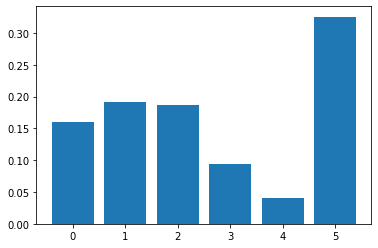

In [52]:
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


0 : Age 
1: Weight
2: ap_hi
3: ap_lo
4: Cholesterol
5: BMI


## Evaluation of SVC

In [53]:
predicted_svc=svm.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, predicted_svc)
print("The accuracy of svc model is : ", accuracy)

The accuracy of svc model is :  0.7315341599805495


In [55]:
conf_mat = confusion_matrix(y_test, predicted_svc)
print("The Confusion Matrix for SVC in this dataset is : \n", conf_mat)

The Confusion Matrix for SVC in this dataset is : 
 [[8135 2215]
 [3306 6909]]


In [56]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [57]:
# Precison
Precision = true_positive/(true_positive+false_positive)
print("The precision of this svc model is : ",Precision)

# Recall
Recall= true_positive/(true_positive+false_negative)
print("The Recall score of svc model is : ",Recall)

# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this dataset is : ",F1_Score)

The precision of this svc model is :  0.7859903381642512
The Recall score of svc model is :  0.7110392448212569
The F1_Score for this dataset is :  0.7466385204901105


## Evaluation of KNN.

In [58]:
predicted_knn=knn.predict(X_test)

In [59]:
accuracy=accuracy_score(y_test,predicted_knn)
print("The accuracy of knn model is : ",accuracy)

The accuracy of knn model is :  0.7316314125942135


In [60]:
conf_mat = confusion_matrix(y_test,predicted_knn)
print("The Confusion Matrix for KNN in this dataset is : \n",conf_mat)

The Confusion Matrix for KNN in this dataset is : 
 [[8127 2223]
 [3296 6919]]


In [61]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [62]:
# Precison
Precision = true_positive/(true_positive+false_positive)
print("The precision of this knn model is : ",Precision)

# Recall
Recall= true_positive/(true_positive+false_negative)
print("The Recall score of knn model is : ",Recall)

# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("The F1_Score for this dataset is : ",F1_Score)

The precision of this knn model is :  0.7852173913043479
The Recall score of knn model is :  0.7114593364265079
The F1_Score for this dataset is :  0.7465209204060074


##HyperParameter Tuning

In [63]:
'''
#List Hyperparameters that we want to tune.
leaf_size = [5,10,20,30,40,50,60]
n_neighbors = [50,100,150,200,250,300]
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
'''


"\n#List Hyperparameters that we want to tune.\nleaf_size = [5,10,20,30,40,50,60]\nn_neighbors = [50,100,150,200,250,300]\np=[1,2]\n#Convert to dictionary\nhyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)\n#Create new KNN object\nknn_2 = KNeighborsClassifier()\n#Use GridSearch\nclf = GridSearchCV(knn_2, hyperparameters, cv=10)\n#Fit the model\nbest_model = clf.fit(X,y)\n#Print The value of best Hyperparameters\nprint('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])\nprint('Best p:', best_model.best_estimator_.get_params()['p'])\nprint('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])\n"

In [64]:
knn = KNeighborsClassifier(leaf_size=40, n_neighbors=200, p=2)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(score)

0.7325553124240214


## Conclusion

#### KNN gives a better result than other models,in terms of Accuracy score so we can use KNN to predict whether a person has CVD or not with a good accuracy of 73.25%.